   #### Mawrer Amed Ramirez Martinez ms723737@iteso.mx
   #### Avance de TOG IDI 4

#  Ajuste de Dataset (Preparacion)


In [6]:
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure
import pandas as pd
import os, glob

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
SOURCE_TYPE = "EURUSD_FULL"
FRECUENCIA = "1M"
NUM_FEATURES = 0


index = None
if FRECUENCIA == "1D":
    index = 1
elif FRECUENCIA == "1H":
    index = 2
elif FRECUENCIA == "1M":
    index = 3
elif FRECUENCIA == "2H":
    index = 4
elif FRECUENCIA == "4H":
    index = 5

In [10]:
pwd = os.getcwd()
datasource_path = os.path.join(pwd, r'../../../Datasets/Junio2020/dukas/EURUSD/'+FRECUENCIA+'/FULL/')
filenames = glob.glob(datasource_path + "/*.csv")
filenames.sort()
for file in filenames:
    print(os.path.basename(file))

FULL_EURUSD_1M_ASK_31.12.2003-31.05.2020.csv
FULL_EURUSD_1M_BID_31.12.2003-31.05.2020.csv


## Read CSV

### Read Ask Dataset

In [12]:
index_ask = 0
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
DATASET_ASK = pd.read_csv(filenames[index_ask], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
DATASET_ASK

,Gmt time,Open,High,Low,Close,Volume
0,2004-01-01 00:00:00,1.25950,1.25960,1.25946,1.25953,499.3
1,2004-01-01 00:01:00,1.25953,1.25953,1.25908,1.25910,822.9
2,2004-01-01 00:02:00,1.25907,1.25910,1.25897,1.25901,438.0
3,2004-01-01 00:05:00,1.25910,1.25920,1.25906,1.25915,704.7
4,2004-01-01 00:06:00,1.25911,1.25920,1.25908,1.25909,164.2


In [14]:
DATASET_ASK.shape

(6144655, 6)

### Read Bid Dataset

In [13]:
index_bid = 1
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
DATASET_BID = pd.read_csv(filenames[index_bid], header=0, parse_dates=['Gmt time'], date_parser=dateparse, 
                          names=['Gmt time','Open_Bid','High_Bid',"Low_Bid","Close_Bid","Volume_Bid"])
DATASET_BID

,Gmt time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid
0,2004-01-01 00:00:00,1.25934,1.25947,1.25930,1.25947,451.7
1,2004-01-01 00:01:00,1.25937,1.25938,1.25901,1.25904,658.6
2,2004-01-01 00:02:00,1.25893,1.25895,1.25881,1.25886,682.2
3,2004-01-01 00:05:00,1.25894,1.25908,1.25894,1.25905,500.8
4,2004-01-01 00:06:00,1.25896,1.25905,1.25892,1.25895,234.2


In [15]:
DATASET_BID.shape

(6144655, 6)

### Merge 2 Datasets ASK + BID

In [16]:
DATASET_FULL = pd.merge(DATASET_ASK,DATASET_BID)
print(DATASET_FULL)

                   Gmt time     Open     High      Low    Close  Volume  \
0       2004-01-01 00:00:00  1.25950  1.25960  1.25946  1.25953  499.30   
1       2004-01-01 00:01:00  1.25953  1.25953  1.25908  1.25910  822.90   
2       2004-01-01 00:02:00  1.25907  1.25910  1.25897  1.25901  438.00   
3       2004-01-01 00:05:00  1.25910  1.25920  1.25906  1.25915  704.70   
4       2004-01-01 00:06:00  1.25911  1.25920  1.25908  1.25909  164.20   
...                     ...      ...      ...      ...      ...     ...   
6144650 2020-06-01 23:55:00  1.11263  1.11265  1.11260  1.11261   88.08   
6144651 2020-06-01 23:56:00  1.11261  1.11262  1.11256  1.11256   64.01   
6144652 2020-06-01 23:57:00  1.11256  1.11256  1.11242  1.11246  202.11   
6144653 2020-06-01 23:58:00  1.11248  1.11265  1.11248  1.11257  205.01   
6144654 2020-06-01 23:59:00  1.11256  1.11260  1.11255  1.11255   96.88   

         Open_Bid  High_Bid  Low_Bid  Close_Bid  Volume_Bid  
0         1.25934   1.25947  1.25930 

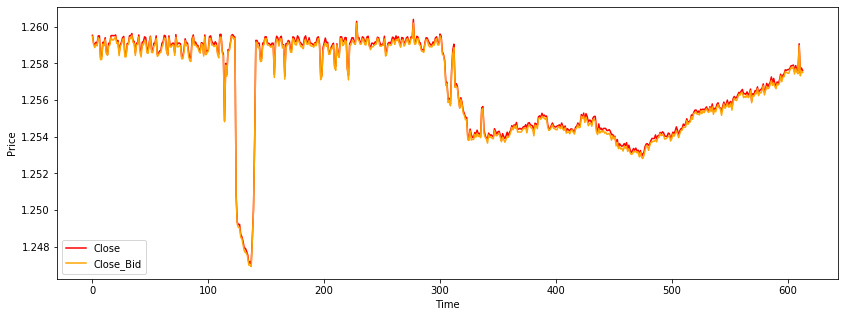

In [31]:
INICIO = 0
FIN = 614
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL["Close"][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL["Close_Bid"][INICIO:FIN], color = 'orange', label = 'Close_Bid')
#pyplot.plot(DATASET_FULL[INICIO:FIN,3], color = 'blue', label = 'Low')
#pyplot.plot(DATASET_FULL[INICIO:FIN,4], color = 'green', label = 'Close')
#pyplot.plot(DATASET_FULL[INICIO:FIN,5], color = 'gray', label = 'Volume')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### Add Col 'Spread' 

In [32]:
DATASET_FULL['Spread'] = DATASET_FULL['Close'] - DATASET_FULL['Close_Bid']
print(DATASET_FULL['Spread'].describe())
print(DATASET_FULL.head(5))

count    6.144655e+06
mean     8.186649e-05
std      6.468324e-05
min      0.000000e+00
25%      3.000000e-05
50%      7.000000e-05
75%      1.000000e-04
max      2.920000e-03
Name: Spread, dtype: float64
             Gmt time     Open     High      Low    Close  Volume  Open_Bid  \
0 2004-01-01 00:00:00  1.25950  1.25960  1.25946  1.25953   499.3   1.25934   
1 2004-01-01 00:01:00  1.25953  1.25953  1.25908  1.25910   822.9   1.25937   
2 2004-01-01 00:02:00  1.25907  1.25910  1.25897  1.25901   438.0   1.25893   
3 2004-01-01 00:05:00  1.25910  1.25920  1.25906  1.25915   704.7   1.25894   
4 2004-01-01 00:06:00  1.25911  1.25920  1.25908  1.25909   164.2   1.25896   

   High_Bid  Low_Bid  Close_Bid  Volume_Bid  Pct_Range_Close   Spread  
0   1.25947  1.25930    1.25947       451.7         0.000000  0.00006  
1   1.25938  1.25901    1.25904       658.6        -0.000341  0.00006  
2   1.25895  1.25881    1.25886       682.2        -0.000071  0.00015  
3   1.25908  1.25894    1.25905 

### Add Col 'day_name' and 'weekday'

In [33]:
DATASET_FULL['day_name'] = DATASET_FULL['Gmt time'].dt.day_name()
DATASET_FULL['weekday'] = DATASET_FULL['Gmt time'].dt.weekday
print(DATASET_FULL.head(5))

             Gmt time     Open     High      Low    Close  Volume  Open_Bid  \
0 2004-01-01 00:00:00  1.25950  1.25960  1.25946  1.25953   499.3   1.25934   
1 2004-01-01 00:01:00  1.25953  1.25953  1.25908  1.25910   822.9   1.25937   
2 2004-01-01 00:02:00  1.25907  1.25910  1.25897  1.25901   438.0   1.25893   
3 2004-01-01 00:05:00  1.25910  1.25920  1.25906  1.25915   704.7   1.25894   
4 2004-01-01 00:06:00  1.25911  1.25920  1.25908  1.25909   164.2   1.25896   

   High_Bid  Low_Bid  Close_Bid  Volume_Bid  Pct_Range_Close   Spread  \
0   1.25947  1.25930    1.25947       451.7         0.000000  0.00006   
1   1.25938  1.25901    1.25904       658.6        -0.000341  0.00006   
2   1.25895  1.25881    1.25886       682.2        -0.000071  0.00015   
3   1.25908  1.25894    1.25905       500.8         0.000111  0.00010   
4   1.25905  1.25892    1.25895       234.2        -0.000048  0.00014   

   day_name  weekday  
0  Thursday        3  
1  Thursday        3  
2  Thursday      

### Add Col 'pct_range_Close' 

In [34]:
DATASET_FULL['Pct_Range_Close'] = DATASET_FULL['Close'].pct_change()
DATASET_FULL['Pct_Range_Close'].fillna(0, inplace=True)
print(DATASET_FULL.head())
print(DATASET_FULL.shape)


             Gmt time     Open     High      Low    Close  Volume  Open_Bid  \
0 2004-01-01 00:00:00  1.25950  1.25960  1.25946  1.25953   499.3   1.25934   
1 2004-01-01 00:01:00  1.25953  1.25953  1.25908  1.25910   822.9   1.25937   
2 2004-01-01 00:02:00  1.25907  1.25910  1.25897  1.25901   438.0   1.25893   
3 2004-01-01 00:05:00  1.25910  1.25920  1.25906  1.25915   704.7   1.25894   
4 2004-01-01 00:06:00  1.25911  1.25920  1.25908  1.25909   164.2   1.25896   

   High_Bid  Low_Bid  Close_Bid  Volume_Bid  Pct_Range_Close   Spread  \
0   1.25947  1.25930    1.25947       451.7         0.000000  0.00006   
1   1.25938  1.25901    1.25904       658.6        -0.000341  0.00006   
2   1.25895  1.25881    1.25886       682.2        -0.000071  0.00015   
3   1.25908  1.25894    1.25905       500.8         0.000111  0.00010   
4   1.25905  1.25892    1.25895       234.2        -0.000048  0.00014   

   day_name  weekday  
0  Thursday        3  
1  Thursday        3  
2  Thursday      

### Differnce Function

In [35]:
def difference(dataset, interval, col_name):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.DataFrame(diff, columns = [col_name + "_diff"])

### Add Col 'Pct_Range_Close_diff' 

In [36]:
DATASET_FULL['Pct_Range_Close_diff'] = difference(DATASET_FULL['Pct_Range_Close'],1,'Pct_Range_Close').shift(1)
DATASET_FULL['Pct_Range_Close_diff'].fillna(0, inplace=True)
print(DATASET_FULL.head())
print(DATASET_FULL.shape)

             Gmt time     Open     High      Low    Close  Volume  Open_Bid  \
0 2004-01-01 00:00:00  1.25950  1.25960  1.25946  1.25953   499.3   1.25934   
1 2004-01-01 00:01:00  1.25953  1.25953  1.25908  1.25910   822.9   1.25937   
2 2004-01-01 00:02:00  1.25907  1.25910  1.25897  1.25901   438.0   1.25893   
3 2004-01-01 00:05:00  1.25910  1.25920  1.25906  1.25915   704.7   1.25894   
4 2004-01-01 00:06:00  1.25911  1.25920  1.25908  1.25909   164.2   1.25896   

   High_Bid  Low_Bid  Close_Bid  Volume_Bid  Pct_Range_Close   Spread  \
0   1.25947  1.25930    1.25947       451.7         0.000000  0.00006   
1   1.25938  1.25901    1.25904       658.6        -0.000341  0.00006   
2   1.25895  1.25881    1.25886       682.2        -0.000071  0.00015   
3   1.25908  1.25894    1.25905       500.8         0.000111  0.00010   
4   1.25905  1.25892    1.25895       234.2        -0.000048  0.00014   

   day_name  weekday  Pct_Range_Close_diff  
0  Thursday        3              0.00000

### Moving Average (MA) Function

In [37]:
#This function add a new column with the MA calculed, with value n
#col_name is the value to be used as base.
def MA(dataset, n, col_name, new_col): 
    MA = pd.Series(dataset[col_name].rolling(n).mean(), name = 'MA_' + col_name +'_'+ str(n)) 
    dataset = dataset.join(MA)  
    return dataset


### Add Col 'MA_Close_5' 

In [38]:
DATASET_FULL = MA(DATASET_FULL,5,'Close','MA_Close_5')
DATASET_FULL['MA_Close_5'].fillna(0, inplace=True)
DATASET_FULL.head(5)

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Pct_Range_Close,Spread,day_name,weekday,Pct_Range_Close_diff,MA_Close_5
0,2004-01-01 00:00:00,1.25950,1.25960,1.25946,1.25953,499.3,1.25934,1.25947,1.25930,1.25947,451.7,0.000000,0.00006,Thursday,3,0.000000,0.000000
1,2004-01-01 00:01:00,1.25953,1.25953,1.25908,1.25910,822.9,1.25937,1.25938,1.25901,1.25904,658.6,-0.000341,0.00006,Thursday,3,-0.000341,0.000000
2,2004-01-01 00:02:00,1.25907,1.25910,1.25897,1.25901,438.0,1.25893,1.25895,1.25881,1.25886,682.2,-0.000071,0.00015,Thursday,3,0.000270,0.000000
3,2004-01-01 00:05:00,1.25910,1.25920,1.25906,1.25915,704.7,1.25894,1.25908,1.25894,1.25905,500.8,0.000111,0.00010,Thursday,3,0.000183,0.000000
4,2004-01-01 00:06:00,1.25911,1.25920,1.25908,1.25909,164.2,1.25896,1.25905,1.25892,1.25895,234.2,-0.000048,0.00014,Thursday,3,-0.000159,1.259176


### Add Col 'MA_Close_25' 

In [39]:
DATASET_FULL = MA(DATASET_FULL,25,'Close','MA_Close_25')
DATASET_FULL['MA_Close_25'].fillna(0, inplace=True)
DATASET_FULL[22:27]

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Pct_Range_Close,Spread,day_name,weekday,Pct_Range_Close_diff,MA_Close_5,MA_Close_25
22,2004-01-01 03:04:00,1.2592,1.25930,1.25914,1.25925,170.3,1.25900,1.25915,1.25899,1.25915,456.7,0.000056,0.00010,Thursday,3,0.000349,1.259400,0.000000
23,2004-01-01 03:05:00,1.2585,1.25858,1.25849,1.25857,418.8,1.25836,1.25845,1.25835,1.25842,640.1,-0.000540,0.00015,Thursday,3,-0.000596,1.259212,0.000000
24,2004-01-01 03:09:00,1.2586,1.25912,1.25859,1.25901,567.0,1.25850,1.25901,1.25849,1.25891,759.0,0.000350,0.00010,Thursday,3,0.000890,1.259112,1.259126
25,2004-01-01 03:10:00,1.2591,1.25917,1.25908,1.25915,302.4,1.25900,1.25908,1.25900,1.25905,524.7,0.000111,0.00010,Thursday,3,-0.000238,1.259032,1.259110
26,2004-01-01 03:12:00,1.2593,1.25940,1.25930,1.25940,148.8,1.25914,1.25930,1.25914,1.25930,203.6,0.000199,0.00010,Thursday,3,0.000087,1.259076,1.259122


### Add Col 'MA_Close_50' 

In [40]:
DATASET_FULL = MA(DATASET_FULL,50,'Close','MA_Close_50')
DATASET_FULL['MA_Close_50'].fillna(0, inplace=True)
DATASET_FULL[48:52]

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Pct_Range_Close,Spread,day_name,weekday,Pct_Range_Close_diff,MA_Close_5,MA_Close_25,MA_Close_50
48,2004-01-01 03:56:00,1.25871,1.25882,1.25865,1.25869,185.0,1.25851,1.25865,1.25848,1.25854,290.0,-0.000103,0.00015,Thursday,3,0.000357,1.259112,1.259108,0.000000
49,2004-01-01 04:01:00,1.25908,1.25920,1.25907,1.25915,923.2,1.25898,1.25905,1.25891,1.25905,819.1,0.000365,0.00010,Thursday,3,0.000469,1.259102,1.259114,1.259120
50,2004-01-01 04:02:00,1.25917,1.25948,1.25917,1.25948,435.0,1.25903,1.25944,1.25903,1.25944,608.8,0.000262,0.00004,Thursday,3,-0.000103,1.259108,1.259127,1.259119
51,2004-01-01 04:05:00,1.25853,1.25876,1.25853,1.25876,384.0,1.25849,1.25861,1.25843,1.25860,413.6,-0.000572,0.00016,Thursday,3,-0.000834,1.258980,1.259102,1.259112


### Add Col 'MA_Close_200' 

In [41]:
DATASET_FULL = MA(DATASET_FULL,200,'Close','MA_Close_200')
DATASET_FULL['MA_Close_200'].fillna(0, inplace=True)
DATASET_FULL[198:202]

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Pct_Range_Close,Spread,day_name,weekday,Pct_Range_Close_diff,MA_Close_5,MA_Close_25,MA_Close_50,MA_Close_200
198,2004-01-01 10:36:00,1.25729,1.25742,1.25723,1.25733,761.9,1.25724,1.25727,1.25711,1.25727,620.2,0.000016,0.00006,Thursday,3,0.001398,1.258508,1.259062,1.259043,0.000000
199,2004-01-01 10:37:00,1.25749,1.25906,1.25749,1.25885,455.0,1.25733,1.25886,1.25733,1.25865,363.6,0.001209,0.00020,Thursday,3,0.001193,1.258398,1.259040,1.259031,1.258135
200,2004-01-01 10:38:00,1.25915,1.25920,1.25905,1.25911,745.2,1.25905,1.25908,1.25892,1.25896,270.4,0.000207,0.00015,Thursday,3,-0.001002,1.258330,1.259037,1.259024,1.258133
201,2004-01-01 11:01:00,1.25945,1.25953,1.25930,1.25938,922.5,1.25935,1.25935,1.25912,1.25912,981.1,0.000214,0.00026,Thursday,3,0.000008,1.258396,1.259044,1.259029,1.258134


In [43]:
DATASET_FULL

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Pct_Range_Close,Spread,day_name,weekday,Pct_Range_Close_diff,MA_Close_5,MA_Close_25,MA_Close_50,MA_Close_200
0,2004-01-01 00:00:00,1.25950,1.25960,1.25946,1.25953,499.30,1.25934,1.25947,1.25930,1.25947,451.70,0.000000,0.00006,Thursday,3,0.000000,0.000000,0.000000,0.000000,0.000000
1,2004-01-01 00:01:00,1.25953,1.25953,1.25908,1.25910,822.90,1.25937,1.25938,1.25901,1.25904,658.60,-0.000341,0.00006,Thursday,3,-0.000341,0.000000,0.000000,0.000000,0.000000
2,2004-01-01 00:02:00,1.25907,1.25910,1.25897,1.25901,438.00,1.25893,1.25895,1.25881,1.25886,682.20,-0.000071,0.00015,Thursday,3,0.000270,0.000000,0.000000,0.000000,0.000000
3,2004-01-01 00:05:00,1.25910,1.25920,1.25906,1.25915,704.70,1.25894,1.25908,1.25894,1.25905,500.80,0.000111,0.00010,Thursday,3,0.000183,0.000000,0.000000,0.000000,0.000000
4,2004-01-01 00:06:00,1.25911,1.25920,1.25908,1.25909,164.20,1.25896,1.25905,1.25892,1.25895,234.20,-0.000048,0.00014,Thursday,3,-0.000159,1.259176,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6144650,2020-06-01 23:55:00,1.11263,1.11265,1.11260,1.11261,88.08,1.11261,1.11262,1.11256,1.11257,48.46,-0.000018,0.00004,Monday,0,0.000036,1.112706,1.112930,1.112987,1.113298
6144651,2020-06-01 23:56:00,1.11261,1.11262,1.11256,1.11256,64.01,1.11259,1.11259,1.11252,1.11253,48.67,-0.000045,0.00003,Monday,0,-0.000027,1.112650,1.112914,1.112974,1.113295
6144652,2020-06-01 23:57:00,1.11256,1.11256,1.11242,1.11246,202.11,1.11254,1.11254,1.11239,1.11244,93.00,-0.000090,0.00002,Monday,0,-0.000045,1.112590,1.112893,1.112957,1.113291
6144653,2020-06-01 23:58:00,1.11248,1.11265,1.11248,1.11257,205.01,1.11245,1.11261,1.11245,1.11255,81.26,0.000099,0.00002,Monday,0,0.000189,1.112566,1.112873,1.112945,1.113288


### Save CSV File 'DF_EURUSD_ASK_1H_PROC.csv'

In [42]:
#Get the Final number of Features
NUM_FEATURES = str(DATASET_FULL.shape[1])
filename = SOURCE_TYPE + '_' + FRECUENCIA + '_' + NUM_FEATURES + 'F.csv'
print(filename)

EURUSD_FULL_1M_20F.csv


In [44]:
pwd = os.getcwd()
filename_path = os.path.join(pwd, r'../../../Datasets/Junio2020/procesados/' + filename)
DATASET_FULL.to_csv(filename_path, header=True, index=False)